Num files: 4441


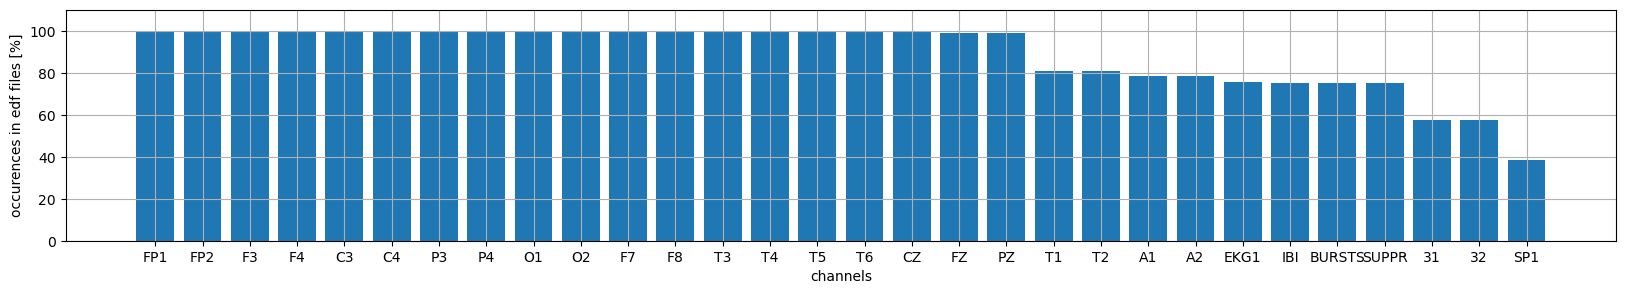

In [5]:
from collections import Counter
import glob
import matplotlib
import matplotlib.pyplot as plt
import os
import pyedflib


edf_path = "/path/to/edf/files"


assert os.path.isdir(edf_path)


class EdfReader(object):
    def __init__(self, path: str):
        self.path = path
    
    def __enter__(self):
        self.file = pyedflib.EdfReader(self.path)
        return self.file
    
    def __exit__(self, *args):
        self.file.close()


def _normalize_channel_name(name: str):
    if name.startswith('EEG '):
        name = name[4:]
    name = name.split('-')[0]
    return name


edf_files = glob.glob(os.path.join(edf_path, "*.edf"))
channel_count = Counter()

for edf_file in edf_files:
    with EdfReader(edf_file) as edf:
        channels = [_normalize_channel_name(n) for n in edf.getSignalLabels()]
        channel_count.update(channels)


matplotlib.rcParams['figure.figsize'] = [20, 3]

num_edf_files = len(edf_files)
most_common = channel_count.most_common(30)
most_common = [(channel, 100 * count / num_edf_files) for channel, count in most_common]

plt.bar(*zip(*most_common))
plt.xlabel("channels")
plt.ylabel("occurences in edf files [%]")
plt.ylim((0, 110))
plt.grid()

print(f'Num files: {len(edf_files)}')